In [2]:
#Importing lib
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Exploring Data

In [8]:
# In order to access the dataset we will use pd.read_csv function since our dataset is a '.csv' file
DB = pd.read_csv(r"C:\Users\Gabriel\Desktop\Projects\Retail Sales\retail_sales_dataset.csv") #in this case the file is local

In [17]:
DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [7]:
# Displaying the first 3 rows of the dataset
DB.head(3)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30


In [14]:
# How many product category they have?
DB["Product Category"].value_counts()

Clothing       351
Electronics    342
Beauty         307
Name: Product Category, dtype: int64

In [21]:
# How many customers we have and do we have multiple entries for the same customers
DB["Customer ID"].value_counts()

CUST001     1
CUST672     1
CUST659     1
CUST660     1
CUST661     1
           ..
CUST339     1
CUST340     1
CUST341     1
CUST342     1
CUST1000    1
Name: Customer ID, Length: 1000, dtype: int64

# Data Analysis

In [65]:
#creating a gender table to check how much each gender spends in the shop
gender_table = DB.pivot_table(index='Gender', values=['Quantity', 'Total Amount'], aggfunc='sum')

In [63]:
gender_table

,Quantity,Total Amount
Gender,,
Female,1298,232840
Male,1216,223160


In [ ]:
#creating a gender table to check how much each gender spends in the shop


# Questions to explore

## How does customer age and gender influence their purchasing behavior?

Text(0.5, 1.0, 'Total Purchases per Gender')

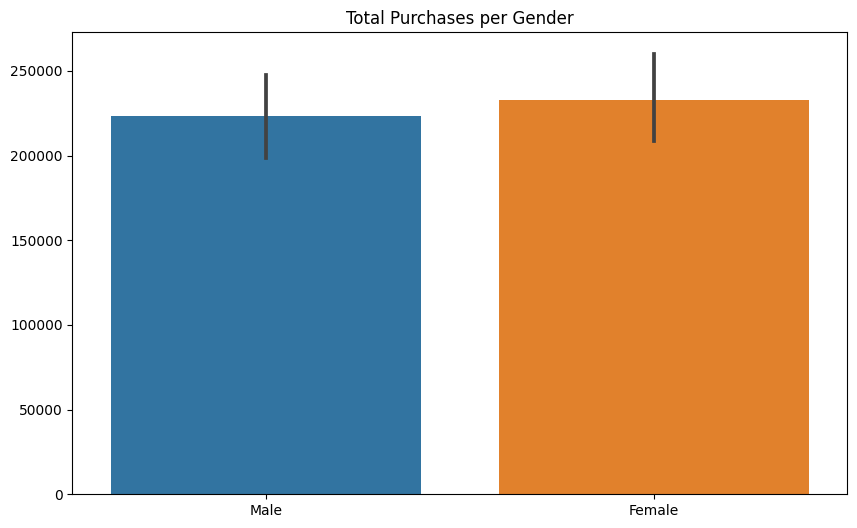

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(data=DB, x="Gender", y="Total Amount", estimator='sum')
plt.xlabel("")
plt.ylabel("")
plt.title("Total Purchases per Gender")

Text(0.5, 1.0, 'Mean Purchases per Gender')

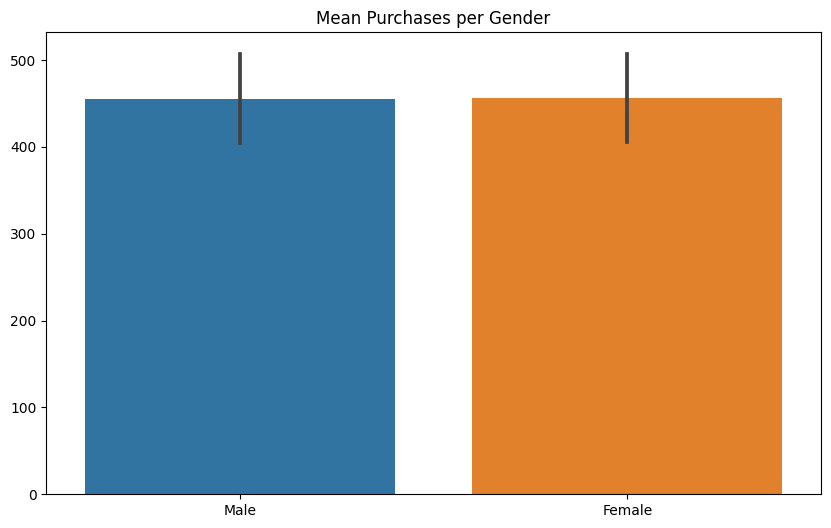

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(data=DB, x="Gender", y="Total Amount", estimator='mean')
plt.xlabel("")
plt.ylabel("")
plt.title("Mean Purchases per Gender")

Text(0.5, 1.0, 'Mean Purchases per Age')

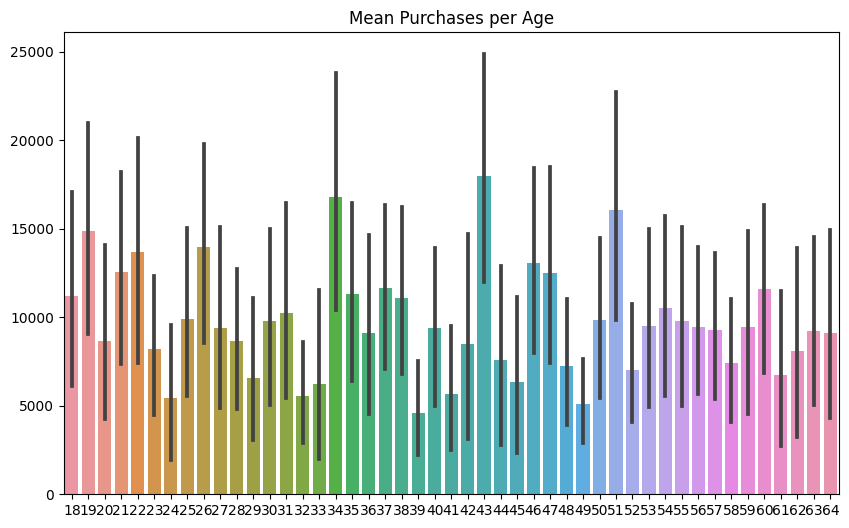

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(data=DB, x="age", y="Total Amount", estimator='sum')
plt.xlabel("")
plt.ylabel("")
plt.title("Mean Purchases per Age") 

### Creating bins for the age

In [47]:
# Define age intervals
bins = [18, 25, 30, 35, 40, 45, 50, 55, 60, 65]
labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64']

# Create a new column with age intervals
DB['age_group'] = pd.cut(DB['Age'], bins=bins, labels=labels, right=False)

# Group by age group and sum the total amounts
grouped_data = DB.groupby('age_group')['Total Amount'].sum().reset_index()

Text(0.5, 1.0, 'Mean Purchases per Age')

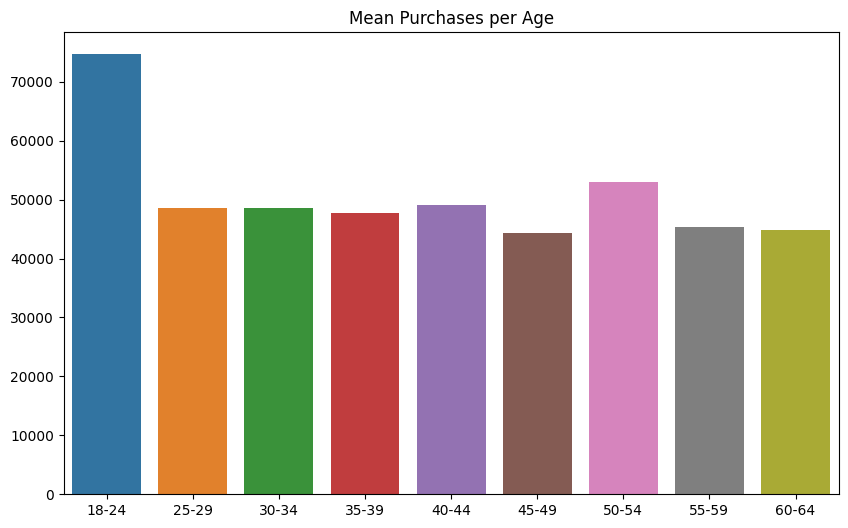

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(data=grouped_data, x="age_group", y="Total Amount", estimator='sum')
plt.xlabel("")
plt.ylabel("")
plt.title("Mean Purchases per Age") 

## Are there discernible patterns in sales across different time periods?

## Which product categories hold the highest appeal among customers?

In [49]:
DB["Product Category"].value_counts()

Clothing       351
Electronics    342
Beauty         307
Name: Product Category, dtype: int64

## What are the relationships between age, spending, and product preferences?

In [86]:
# Here we need to group the information by Product and age
product_db = DB.groupby(['Product Category', 'age_group'])['Quantity', 'Total Amount'].sum().reset_index()

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_21860\4241145646.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  product_db = DB.groupby(['Product Category', 'age_group'])['Quantity', 'Total Amount'].sum().reset_index()


### Beauty DB

In [93]:
#If we want to check each product type individually we can create a new db with the info we have
beautydb = product_db[(product_db["Product Category"]=="Beauty")]
beautydb

,Product Category,age_group,Quantity,Total Amount
0,Beauty,18-24,136,28905
1,Beauty,25-29,79,12495
2,Beauty,30-34,98,16045
3,Beauty,35-39,72,17340
4,Beauty,40-44,57,12110
5,Beauty,45-49,113,22535
6,Beauty,50-54,73,13415
7,Beauty,55-59,78,15050
8,Beauty,60-64,65,5620


Text(0.5, 1.0, 'Beauty Product Sales in $')

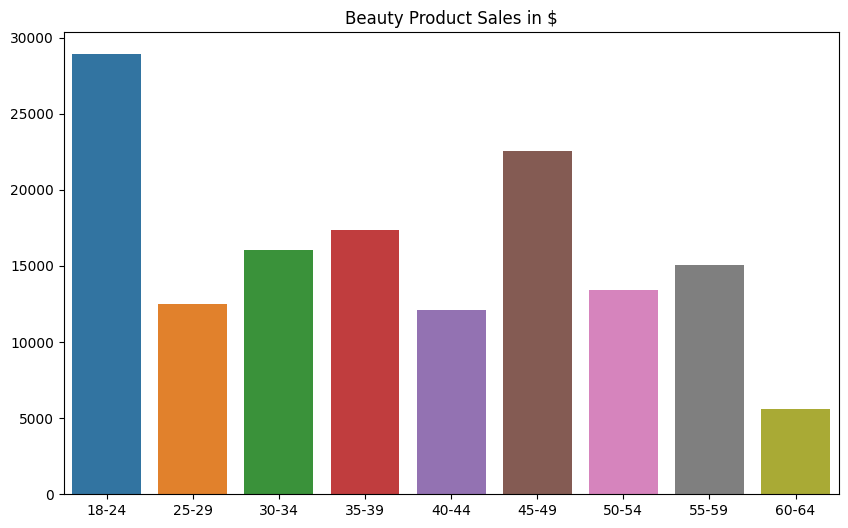

In [95]:
plt.figure(figsize=(10,6))
sns.barplot(data=beautydb, x="age_group", y="Total Amount", estimator='sum')
plt.xlabel("")
plt.ylabel("")
plt.title("Beauty Product Sales in $") 

Text(0.5, 1.0, 'Beauty Product Sales in units')

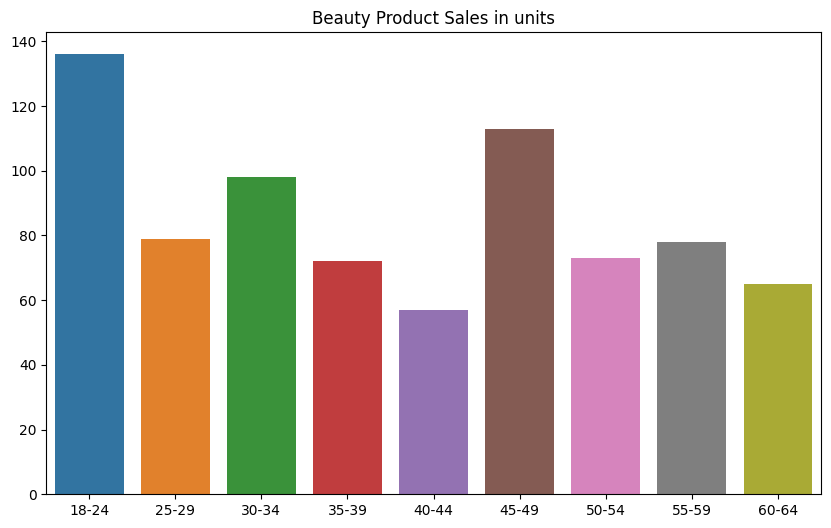

In [97]:
plt.figure(figsize=(10,6))
sns.barplot(data=beautydb, x="age_group", y="Quantity", estimator='sum')
plt.xlabel("")
plt.ylabel("")
plt.title("Beauty Product Sales in units") 

### Clothing DB

In [98]:
clothingdb = product_db[(product_db["Product Category"]=="Clothing")]
clothingdb

,Product Category,age_group,Quantity,Total Amount
9,Clothing,18-24,112,22160
10,Clothing,25-29,102,23990
11,Clothing,30-34,81,17650
12,Clothing,35-39,82,12690
13,Clothing,40-44,134,18235
14,Clothing,45-49,85,13785
15,Clothing,50-54,109,15760
16,Clothing,55-59,84,16180
17,Clothing,60-64,105,15130


Text(0.5, 1.0, 'Clothing Product Sales in $')

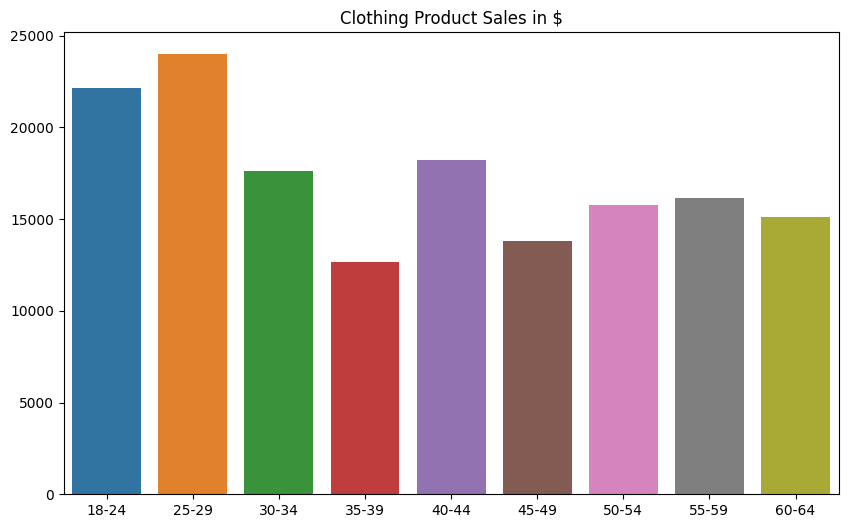

In [99]:
plt.figure(figsize=(10,6))
sns.barplot(data=clothingdb, x="age_group", y="Total Amount", estimator='sum')
plt.xlabel("")
plt.ylabel("")
plt.title("Clothing Product Sales in $") 